# Modeling using XGB Classifier

In [2]:
# Loading Libraries
import numpy as np 
import pandas as pd

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score

from tabulate import tabulate

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(10, 8)

In [4]:
# Loading data
PATH = 'train_short_features.csv'
df=pd.read_csv(PATH)
df.head()

,from-to,score,userA_id,userB_id,has_common_skills,n_common_skills,has_common_schools,n_common_schools,has_common_industry,n_common_industry,has_common_company,n_common_company,userA_age,userB_age,userA_purpose_id_1,userA_purpose_id_2,userA_purpose_id_3,userA_purpose_id_4,userA_purpose_id_5,userA_purpose_id_6,userA_purpose_id_7,userA_purpose_id_8,userA_purpose_id_9,userA_purpose_id_10,userA_purpose_id_11,userA_purpose_id_12,userA_purpose_id_13,userA_purpose_id_14,userA_purpose_id_15,userB_purpose_id_1,userB_purpose_id_2,userB_purpose_id_3,userB_purpose_id_4,userB_purpose_id_5,userB_purpose_id_6,userB_purpose_id_7,userB_purpose_id_8,userB_purpose_id_9,userB_purpose_id_10,userB_purpose_id_11,userB_purpose_id_12,userB_purpose_id_13,userB_purpose_id_14,userB_purpose_id_15,userA_strength_id_1,userA_strength_id_2,userA_strength_id_3,userA_strength_id_4,userA_strength_id_5,userA_strength_id_6,userA_strength_id_7,userA_strength_id_8,userB_strength_id_1,userB_strength_id_2,userB_strength_id_3,userB_strength_id_4,userB_strength_id_5,userB_strength_id_6,userB_strength_id_7,userB_strength_id_8
0,4769697-6308211,3.0,4769697.0,6308211.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,37.0,28.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,15.0,6.0,14.0,0.0,8.0
1,6275668-6308211,2.0,6275668.0,6308211.0,1.0,-2.0,0.0,-1.0,0.0,0.0,1.0,-2.0,28.0,28.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,3.0,3.0,15.0,6.0,14.0,0.0,8.0
2,6307254-6308211,3.0,6307254.0,6308211.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,-2.0,28.0,28.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,15.0,6.0,14.0,0.0,8.0
3,1208644-6308211,2.0,1208644.0,6308211.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,-2.0,44.0,28.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,15.0,6.0,14.0,0.0,8.0
4,6275807-6308211,3.0,6275807.0,6308211.0,1.0,-2.0,0.0,-1.0,1.0,1.0,1.0,-2.0,45.0,28.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,3.0,3.0,15.0,6.0,14.0,0.0,8.0


## Preprocessing

In [5]:
# Feature label
X = df.drop(labels=['from-to','userA_id','score', 'userA_id', 'userB_id'],
            axis=1)
y = df['score']

In [6]:
# Train-test Split
# 70-15-15
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=3,
                                                    stratify=y)
X_val,X_test,y_val,y_test =train_test_split(X_test,y_test,
                                            test_size=0.5,
                                            random_state=3,
                                            stratify=y_test)

## Model Building

In [17]:
# model init
clf=XGBClassifier(random_state=96)
# model Train
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
# f1 Score over train and test
data = [
    ('set', 'f1_score(micro)'),
    ('Train', f1_score(y_train, clf.predict(X_train), average='micro')),
    ('Validation', f1_score(y_val, clf.predict(X_val), average='micro'))
]
print(tabulate(data, headers='firstrow'))

set           f1_score(micro)
----------  -----------------
Train                0.498971
Validation           0.442373


## Hyperparameter Optimization

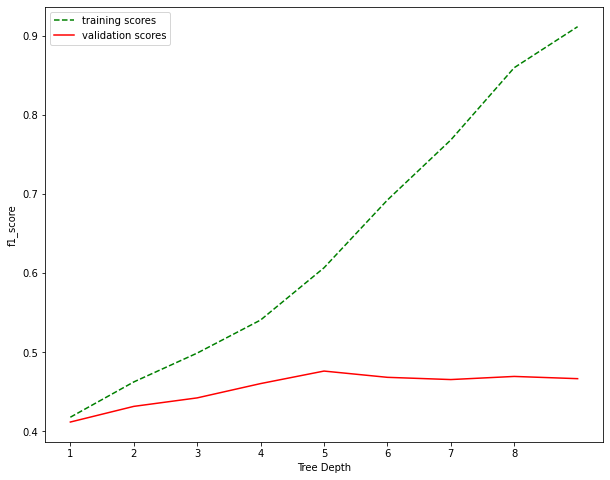

In [22]:
# Tree Depth optimization
depths = range(1, 10)
#
train_scores = []
val_scores = []
#
for depth in depths:
    dt_model = XGBClassifier(random_state=3, max_depth=depth)
    dt_model.fit(X_train, y_train)
    train_scores.append( f1_score(y_train, dt_model.predict(X_train), average='micro'))
    val_scores.append( f1_score(y_val, dt_model.predict(X_val), average='micro'))
#
# Plot
plt.plot(train_scores, 'g--', label='training scores')
plt.plot(val_scores, 'r', label='validation scores')
plt.ylabel('f1_score')
plt.xlabel('Estimators Depth')
plt.xticks(range(0, len(depths)-1), labels=depths)
plt.legend()
plt.show()

## Optimised model 

In [25]:
# Model init
dt_model = XGBClassifier(max_depth=5, random_state=3, n_estimators=200)
#Fit
dt_model.fit(X_train, y_train)
#
# Scoring
data = [
    ('set', 'f1_score(micro)'),
    ('Train', f1_score(y_train, dt_model.predict(X_train), average='micro')),
    ('Validation', f1_score(y_val, dt_model.predict(X_val), average='micro')),
    ('Test', f1_score(y_test, dt_model.predict(X_test), average='micro'))
]
print(tabulate(data, headers='firstrow'))

set           f1_score(micro)
----------  -----------------
Train                0.930483
Validation           0.472316
Test                 0.489266


**Insights**
- XGBClassifier score 46+% while Decision Tree Classifier Scores 39%

In [27]:
# Saving Mode
from pickle import dump
dump(clf, open('model_XGB.pkl', 'wb'))